In [17]:
import pandas as pd

In [18]:
!pip install folium

In [19]:
datos_hospitales = pd.read_csv('/content/hospitales_issste.csv', encoding='utf-8')
datos_hospitales['nombre']=datos_hospitales['nombre'].str.replace('" ','"')
datos_hospitales.drop_duplicates(['nombre'],inplace=True)
datos_hospitales.head()

,id,geo_point_2d,geo_shape,objectid_1,nombre,y_latitud,x_longitu,e_hos_seg,e_h_s_ano
0,0,"19.4846832962,-99.1363064788","{""type"": ""Point"", ""coordinates"": [-99.13630647...",2,H. G. P. No. 3-A MAGDALENA DE LAS SALINAS 2N,19.484683,-99.136306,NaN,S/D
1,1,"19.4797919996,-99.1886539997","{""type"": ""Point"", ""coordinates"": [-99.18865399...",8,Hospital de Gineco-Obstetricia con Medicina Fa...,19.479792,-99.188654,NaN,S/D
2,2,"19.4551689999,-99.1403889998","{""type"": ""Point"", ""coordinates"": [-99.14038899...",24,"Hospital de Gineco Obstetricia Tlatelolco ""Hos...",19.455169,-99.140389,NaN,S/D
3,3,"19.404598614,-99.1112466757","{""type"": ""Point"", ""coordinates"": [-99.11124667...",53,"Hospital General de Zona No. 2A ""Troncoso""",19.404599,-99.111247,NaN,2018
4,4,"19.2982719997,-99.0220820002","{""type"": ""Point"", ""coordinates"": [-99.02208200...",56,Unidad Médica de Atención Ambulatoria No. 162,19.298272,-99.022082,NaN,S/D


In [20]:
hospitales = datos_hospitales['nombre'].tolist()
hospitales

['H. G. P. No. 3-A MAGDALENA DE LAS SALINAS 2N',
 'Hospital de Gineco-Obstetricia con Medicina Familiar No. 13',
 'Hospital de Gineco Obstetricia Tlatelolco "Hospital Amigo del Niño y de la Madre"',
 'Hospital General de Zona No. 2A "Troncoso"',
 'Unidad Médica de Atención Ambulatoria No. 162',
 'HOSPITAL REGIONAL "1  DE OCTUBRE"',
 'CENTRO MEDICO NACIONAL "20 DE NOVIEMBRE"',
 'HOSPITAL REGIONAL "LIC. ADOLFO LOPEZ MATEOS"',
 'CENTRO DE APOYO DIAGNÓSTICO "SAN RAFAEL"',
 'HOSPITAL GENERAL "DR. DARIO FERNANDEZ FIERRO"',
 'HOSPITAL GENERAL "JOSE Ma. MORELOS Y PAVON"',
 'HOSPITAL GENERAL "TACUBA"',
 'HOSPITAL GENERAL "DR. FERNANDO QUIROZ GUTIERREZ"',
 'Hospital de Gíneco Pediatría 3A',
 'Hospital General de Zona No. 24 "Insurgentes"',
 'Hospital General Regional No. 25',
 'Hospital General de Zona No. 30 "Iztacalco"',
 'Hospital General de Zona No. 47 "Vicente Guerrero"',
 'HOSPITAL GENERAL "GONZALO CASTAÑEDA"',
 'HOSPITAL REGIONAL "GRAL. IGNACIO ZARAGOZA"',
 'Hospital General de Zona No. 2

In [21]:
ubicaciones = datos_hospitales[['y_latitud','x_longitu']].values.tolist()
ubicaciones

[[19.484683, -99.136306],
 [19.479792, -99.188654],
 [19.455169, -99.140389],
 [19.404598999999997, -99.11124699999999],
 [19.298272, -99.022082],
 [19.486908, -99.133726],
 [19.372574, -99.171123],
 [19.358601, -99.172337],
 [19.435827, -99.163279],
 [19.362745999999998, -99.189193],
 [19.365022, -98.997668],
 [19.457223000000003, -99.191577],
 [19.395425, -99.192994],
 [19.485777, -99.134734],
 [19.482147, -99.12884100000001],
 [19.387585, -99.035422],
 [19.398486, -99.111139],
 [19.356451999999997, -99.053651],
 [19.453803, -99.136414],
 [19.390361, -99.04587099999999],
 [19.452788, -99.137363],
 [19.465127, -99.086034],
 [19.369157, -99.152822]]

In [22]:

import folium
m = folium.Map(
    location=[19.42847, -99.12766],
    zoom_start=12,
)
for i in range(len(hospitales)):
  if hospitales[i]=='CENTRO MEDICO NACIONAL "20 DE NOVIEMBRE"':
    folium.Marker(ubicaciones[i], tooltip=hospitales[i],popup=hospitales[i], icon = folium.Icon(color='green',icon='plus')).add_to(m)
  else:
    folium.Marker(ubicaciones[i], tooltip=hospitales[i],popup=hospitales[i], icon = folium.Icon(color='red',icon='plus')).add_to(m)
m

In [23]:
from math import sin, cos, sqrt, atan2, radians

def distancia_geo(puntoA,puntoB):
  R = 6373.0
  dlon = radians(puntoA[1]) - radians(puntoB[1])
  dlat = radians(puntoA[0]) - radians(puntoB[0])
  a = sin(dlat / 2)**2 + cos(puntoA[0]) * cos(puntoB[0]) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))
  distance = R * c
  return distance

In [24]:
dist_dict = {c:{} for c in hospitales}
for idx_1 in range(0,len(ubicaciones)-1):
    for idx_2 in range(idx_1+1,len(ubicaciones)):
        oxxo_a = ubicaciones[idx_1]
        oxxo_b = ubicaciones[idx_2]
        dist = distancia_geo(oxxo_a,oxxo_b)
        dist_dict[hospitales[idx_1]][hospitales[idx_2]] = dist

# Algoritmo secuencial

In [82]:
import random
import operator
from numpy import vectorize
class GeneticAlgo():
    
    def __init__(self,hash_map,start,steps=2,crossover_prob=0.15,mutation_prob=0.15,population_size=5,iterations=100):
        self.crossover_prob=crossover_prob
        self.mutation_prob=mutation_prob
        self.population_size=population_size
        self.hash_map = hash_map
        self.steps = steps
        self.iterations = iterations
        self.start = start
        self.cities = [k for k in self.hash_map.keys()] 
        self.cities.remove(start)
        self.genes = []
        self.epsilon = 1 - 1/self.iterations        
        self.generate_genes()
        
    def generate_genes(self):
        for i in range(self.population_size):
            gene = [self.start]
            options = [k for k in self.cities]
            while len(gene) < len(self.cities)+1:
                city = random.choice(options)
                loc = options.index(city)
                gene.append(city)
                del options[loc]
            gene.append(self.start)
            self.genes.append(gene)
        return self.genes
    
    def evaluate_fitness(self):
        fitness_scores = []
        for gene in self.genes:
            total_distance = 0
            for idx in range(1,len(gene)):
                city_b = gene[idx]
                city_a = gene[idx-1]
                try:
                    dist = self.hash_map[city_a][city_b]
                except:
                    dist = self.hash_map[city_b][city_a]
                total_distance += dist
            fitness = 1/total_distance
            fitness_scores.append(fitness)
        return fitness_scores
    
    def evolve(self):
        index_map = {i:'' for i in range(1,len(self.cities)+1)}
        indices = [i for i in range(1,len(self.cities)+1)]
        to_visit = [c for c in self.cities]
        cross = (1 - self.epsilon) * self.crossover_prob
        mutate = self.epsilon * self.mutation_prob 
        crossed_count = int(cross * len(self.cities)+1)
        mutated_count = int((mutate * len(self.cities)+1)/2)
        for idx in range(len(self.genes)):
            gene = self.genes[idx]
            for i in range(crossed_count):
                try:
                    gene_index = random.choice(indices)
                    sample = gene[gene_index]
                    if sample in to_visit:
                        index_map[gene_index] = sample
                        loc = indices.index(gene_index)
                        del indices[loc]
                        loc = to_visit.index(sample)
                        del to_visit[loc]
                    else:
                        continue
                except:
                    pass
        last_gene = self.genes[-1]
        remaining_cities = [c for c in last_gene if c in to_visit]
        for k,v in index_map.items():
            if v != '':
                continue
            else:
                city = remaining_cities.pop(0)
                index_map[k] = city
        new_gene = [index_map[i] for i in range(1,len(self.cities)+1)]
        new_gene.insert(0,self.start)
        new_gene.append(self.start)
        for i in range(mutated_count):
            choices = [c for c in new_gene if c != self.start]
            city_a = random.choice(choices)
            city_b = random.choice(choices)
            index_a = new_gene.index(city_a)
            index_b = new_gene.index(city_b)
            new_gene[index_a] = city_b
            new_gene[index_b] = city_a

        self.genes.append(new_gene)
                
    def prune_genes(self):       
        for i in range(self.steps):
            self.evolve()
        fitness_scores = self.evaluate_fitness()
        for i in range(self.steps):
            worst_gene_index = fitness_scores.index(min(fitness_scores))
            del self.genes[worst_gene_index]
            del fitness_scores[worst_gene_index]
        return max(fitness_scores),self.genes[fitness_scores.index(max(fitness_scores))]
    
    def converge(self):
        for i in range(self.iterations):
            values = self.prune_genes()
            current_score = values[0]
            current_best_gene = values[1]
            self.epsilon -= 1/self.iterations
            if i % 1000 == 0:
                print(f"{1/current_score} kilometros")
                
        return current_best_gene

g = GeneticAlgo(hash_map=dist_dict,start='CENTRO MEDICO NACIONAL "20 DE NOVIEMBRE"',mutation_prob=0.25,crossover_prob=0.25,
                 population_size=20,steps=15,iterations=10000)
ruta = g.converge()
ruta

191.4390206681687 kilometros
102.78245519577123 kilometros
83.29429480424992 kilometros
80.90860002957432 kilometros
80.1516183686135 kilometros
80.1516183686135 kilometros
80.1516183686135 kilometros
80.1516183686135 kilometros
80.1516183686135 kilometros
80.1516183686135 kilometros


['CENTRO MEDICO NACIONAL "20 DE NOVIEMBRE"',
 'HOSPITAL GENERAL "DR. DARIO FERNANDEZ FIERRO"',
 'HOSPITAL REGIONAL "LIC. ADOLFO LOPEZ MATEOS"',
 'Hospital General de Zona No. 1 "Venados"',
 'Hospital General de Zona No. 30 "Iztacalco"',
 'Hospital General de Zona No. 2A "Troncoso"',
 'HOSPITAL REGIONAL "GRAL. IGNACIO ZARAGOZA"',
 'Hospital General de Zona No. 47 "Vicente Guerrero"',
 'Unidad Médica de Atención Ambulatoria No. 162',
 'HOSPITAL GENERAL "JOSE Ma. MORELOS Y PAVON"',
 'Hospital General Regional No. 25',
 'Hospital General de Zona con Medicina Familiar No. 29',
 'HOSPITAL GENERAL "GONZALO CASTAÑEDA"',
 'Hospital General de Zona No. 27 "Dr. Alfredo Badallo"',
 'Hospital de Gineco Obstetricia Tlatelolco "Hospital Amigo del Niño y de la Madre"',
 'Hospital General de Zona No. 24 "Insurgentes"',
 'HOSPITAL REGIONAL "1  DE OCTUBRE"',
 'Hospital de Gíneco Pediatría 3A',
 'H. G. P. No. 3-A MAGDALENA DE LAS SALINAS 2N',
 'Hospital de Gineco-Obstetricia con Medicina Familiar No. 13',

In [10]:
ruta_coordenadas =[ubicaciones[j] for j in [hospitales.index(i) for i in ruta]]
ruta_coordenadas

[[19.372574, -99.171123],
 [19.395425, -99.192994],
 [19.435827, -99.163279],
 [19.457223000000003, -99.191577],
 [19.479792, -99.188654],
 [19.455169, -99.140389],
 [19.452788, -99.137363],
 [19.453803, -99.136414],
 [19.484683, -99.136306],
 [19.485777, -99.134734],
 [19.486908, -99.133726],
 [19.482147, -99.12884100000001],
 [19.465127, -99.086034],
 [19.387585, -99.035422],
 [19.365022, -98.997668],
 [19.298272, -99.022082],
 [19.356451999999997, -99.053651],
 [19.390361, -99.04587099999999],
 [19.404598999999997, -99.11124699999999],
 [19.398486, -99.111139],
 [19.369157, -99.152822],
 [19.358601, -99.172337],
 [19.362745999999998, -99.189193],
 [19.372574, -99.171123]]

In [11]:
import folium
m = folium.Map(
    location=[19.42847, -99.12766],
    zoom_start=12,
)
for i in range(len(hospitales)):
  if hospitales[i]=='CENTRO MEDICO NACIONAL "20 DE NOVIEMBRE"':
    folium.Marker(ubicaciones[i], tooltip=hospitales[i],popup=hospitales[i], icon = folium.Icon(color='green',icon='plus')).add_to(m)
  else:
    folium.Marker(ubicaciones[i], tooltip=hospitales[i],popup=hospitales[i], icon = folium.Icon(color='red',icon='plus')).add_to(m)
folium.PolyLine(ruta_coordenadas, color='blue').add_to(m)
m

# Paralelizacion

In [99]:
import random
import operator
from numpy import vectorize
import multiprocessing as mp 
import threading as td
class GeneticAlgoParallel():
    
    def __init__(self,hash_map,start,steps=2,crossover_prob=0.15,mutation_prob=0.15,population_size=5,iterations=100,procesos=1, prints=True):
        self.prints=prints
        self.procesos=procesos
        self.crossover_prob=crossover_prob
        self.mutation_prob=mutation_prob
        self.population_size=population_size
        self.hash_map = hash_map
        self.steps = steps
        self.iterations = iterations
        self.start = start
        self.cities = [k for k in self.hash_map.keys()] 
        self.cities.remove(start)
        self.genes = []
        self.epsilon = 1 - 1/self.iterations   
        self.generate_genes()     

    def gen(self,x):
        gene = [self.start]
        options = [k for k in self.cities]
        while len(gene) < len(self.cities)+1:
            city = random.choice(options)
            loc = options.index(city)
            gene.append(city)
            del options[loc]
        gene.append(self.start)
        return gene

    def generate_genes(self):
      '''
      Paralelizamos la generacion de la poblacion inicial usando un Pool de procesos, cada proceso lo que hara es generar una cantidad de genes igual a el tamaño_poblacion/num_procesos.
      cada gen se genera de forma aleatoria
      '''
      p=mp.Pool(self.procesos)  
      self.genes=p.map(self.gen,list(range(0,20)))
      return self.genes
    
    def fitness(self,genes,scores):
      fitness_scores=[]
      for gene,i in genes: 
        total_distance = 0
        for idx in range(1,len(gene)):
            city_b = gene[idx]
            city_a = gene[idx-1]
            try:
                dist = self.hash_map[city_a][city_b]
            except:
                dist = self.hash_map[city_b][city_a]
            total_distance += dist
        fitness = 1/total_distance
        scores.put((fitness,i))

    def evaluate_fitness(self):
        '''
        Usamos n procesos para evaluar cada uno de los genes de una generacion, entonces dividimos la generacion entre los n procesos y esto nos da la cantidad de genes
        que evaluara cada proceso, Para esto usamos una Cola y para cada resultado tambien agregamos el indice del gen al que pertenece dicho resultado, esto debido a que los procesos iran agregando
        a la cola los resultados de forma asincrona, entonces al sacar los resultados de la cola no necesariamente saldrane n el orden en el que estan los genes en la lista de la generacion
        '''
        fitness_scores=[0]*len(self.genes)
        scores=mp.Queue()
        datos_por_proceso=int(self.population_size/self.procesos)
        genes=[[] for i in range(self.procesos)]
        for i in range(len(self.genes)):
          genes[i%self.procesos].append([self.genes[i],i])
        for i in range(len(genes)):
          p=mp.Process(target=self.fitness,args=(genes[i],scores))
          p.start()
          p.join()
        while not scores.empty():
          fitness=scores.get()
          fitness_scores[fitness[1]]=fitness[0]
        return fitness_scores
    
    def cross(self,idxs,lock_index_map,lock_indices,lock_to_visit,crossed_count):
      global index_map
      global indices
      global to_visit
      for idx in idxs:
        gene = self.genes[idx]
        for i in range(crossed_count):
            try:
                gene_index = random.choice(indices)
                sample = gene[gene_index]
                if sample in to_visit:
                    # Identificamos 3 regiones criticas en esta funcion
                    lock_index_map.acquire()
                    index_map[gene_index] = sample #La primera region critica es al modificar el index_map que es un recurso compartido
                    lock_index_map.release()
                    loc = indices.index(gene_index)
                    lock_indices.acquire()
                    del indices[loc] # La segunda pasa cuando modificamos indices por que tambien es compartido
                    lock_indices.release()
                    loc = to_visit.index(sample)
                    lock_to_visit.acquire()
                    del to_visit[loc] # Por ultimo aqui tenemos la tercera region critica
                    lock_to_visit.release()
                else:
                    continue
            except:
                pass

    def evolve(self):
        '''
        Paralelizamos el cruzado de los genes, para esto tenemos como variables globales index_map, indices, y to_visit y haremos la paralelizacion usando threads para no tener que usar un mecanismo 
        de comunicacion entre ellos y asi optimizar el tiempo. Sin embargo hay que agregar ciertos bloqueos o locks, ya que los hilos estaran modificando a la vez estas tres variables. 
        '''
        global index_map
        global indices
        global to_visit

        index_map = {i:'' for i in range(1,len(self.cities)+1)}
        indices = [i for i in range(1,len(self.cities)+1)]
        to_visit = [c for c in self.cities]

        cross = (1 - self.epsilon) * self.crossover_prob
        mutate = self.epsilon * self.mutation_prob 
        crossed_count = int(cross * len(self.cities)+1)
        mutated_count = int((mutate * len(self.cities)+1)/2)

        lock_index_map=td.Lock()
        lock_indices=td.Lock()
        lock_to_visit=td.Lock()
        idxs=[[] for i in range(self.procesos)]
        for i in range(len(self.genes)):
          idxs[i%self.procesos].append(i)
        for i in idxs:
            t = td.Thread(target=self.cross, args=(i,lock_index_map,lock_indices,lock_to_visit,crossed_count,))
            t.start()
            t.join()
        
        last_gene = self.genes[-1]
        remaining_cities = [c for c in last_gene if c in to_visit]
        for k,v in index_map.items():
            if v != '':
                continue
            else:
                city = remaining_cities.pop(0)
                index_map[k] = city
        new_gene = [index_map[i] for i in range(1,len(self.cities)+1)]
        new_gene.insert(0,self.start)
        new_gene.append(self.start)
        for i in range(mutated_count):
            choices = [c for c in new_gene if c != self.start]
            city_a = random.choice(choices)
            city_b = random.choice(choices)
            index_a = new_gene.index(city_a)
            index_b = new_gene.index(city_b)
            new_gene[index_a] = city_b
            new_gene[index_b] = city_a
        self.genes.append(new_gene)
                
    def prune_genes(self):       
        for i in range(self.steps):
            self.evolve()
        fitness_scores = self.evaluate_fitness()
        for i in range(self.steps):
            worst_gene_index = fitness_scores.index(min(fitness_scores))
            del self.genes[worst_gene_index]
            del fitness_scores[worst_gene_index]
        return max(fitness_scores),self.genes[fitness_scores.index(max(fitness_scores))]
    
    def converge(self):
        for i in range(self.iterations):
            values = self.prune_genes()
            current_score = values[0]
            current_best_gene = values[1]
            self.epsilon -= 1/self.iterations
            if i % 100 == 0 and self.prints:
                print(f"{1/current_score} kilometros")
                
        return current_best_gene

g = GeneticAlgoParallel(hash_map=dist_dict,start='CENTRO MEDICO NACIONAL "20 DE NOVIEMBRE"',mutation_prob=0.25,crossover_prob=0.25,
                 population_size=20,steps=15,iterations=1000, procesos=1)

In [94]:
g.converge()

178.78684209250503 kilometros
153.32568607634389 kilometros
138.08756794813632 kilometros
115.08976835211121 kilometros
100.46851997206312 kilometros
85.74461544638406 kilometros
83.33539683198529 kilometros
80.13442153888566 kilometros
79.86652149038379 kilometros
79.86652149038379 kilometros


['CENTRO MEDICO NACIONAL "20 DE NOVIEMBRE"',
 'HOSPITAL GENERAL "DR. DARIO FERNANDEZ FIERRO"',
 'HOSPITAL GENERAL "DR. FERNANDO QUIROZ GUTIERREZ"',
 'CENTRO DE APOYO DIAGNÓSTICO "SAN RAFAEL"',
 'Hospital General de Zona No. 27 "Dr. Alfredo Badallo"',
 'HOSPITAL GENERAL "GONZALO CASTAÑEDA"',
 'Hospital de Gineco Obstetricia Tlatelolco "Hospital Amigo del Niño y de la Madre"',
 'HOSPITAL GENERAL "TACUBA"',
 'Hospital de Gineco-Obstetricia con Medicina Familiar No. 13',
 'H. G. P. No. 3-A MAGDALENA DE LAS SALINAS 2N',
 'Hospital de Gíneco Pediatría 3A',
 'HOSPITAL REGIONAL "1  DE OCTUBRE"',
 'Hospital General de Zona No. 24 "Insurgentes"',
 'Hospital General de Zona con Medicina Familiar No. 29',
 'Hospital General de Zona No. 2A "Troncoso"',
 'Hospital General de Zona No. 30 "Iztacalco"',
 'HOSPITAL REGIONAL "GRAL. IGNACIO ZARAGOZA"',
 'Hospital General Regional No. 25',
 'HOSPITAL GENERAL "JOSE Ma. MORELOS Y PAVON"',
 'Unidad Médica de Atención Ambulatoria No. 162',
 'Hospital General d

In [95]:
ruta_coordenadas =[ubicaciones[j] for j in [hospitales.index(i) for i in ruta]]
ruta_coordenadas

[[19.372574, -99.171123],
 [19.362745999999998, -99.189193],
 [19.358601, -99.172337],
 [19.369157, -99.152822],
 [19.398486, -99.111139],
 [19.404598999999997, -99.11124699999999],
 [19.390361, -99.04587099999999],
 [19.356451999999997, -99.053651],
 [19.298272, -99.022082],
 [19.365022, -98.997668],
 [19.387585, -99.035422],
 [19.465127, -99.086034],
 [19.453803, -99.136414],
 [19.452788, -99.137363],
 [19.455169, -99.140389],
 [19.482147, -99.12884100000001],
 [19.486908, -99.133726],
 [19.485777, -99.134734],
 [19.484683, -99.136306],
 [19.479792, -99.188654],
 [19.457223000000003, -99.191577],
 [19.435827, -99.163279],
 [19.395425, -99.192994],
 [19.372574, -99.171123]]

In [96]:
import folium
m = folium.Map(
    location=[19.42847, -99.12766],
    zoom_start=12,
)
for i in range(len(hospitales)):
  if hospitales[i]=='CENTRO MEDICO NACIONAL "20 DE NOVIEMBRE"':
    folium.Marker(ubicaciones[i], tooltip=hospitales[i],popup=hospitales[i], icon = folium.Icon(color='green',icon='plus')).add_to(m)
  else:
    folium.Marker(ubicaciones[i], tooltip=hospitales[i],popup=hospitales[i], icon = folium.Icon(color='red',icon='plus')).add_to(m)
folium.PolyLine(ruta_coordenadas, color='blue').add_to(m)
m

# Midiendo el rendimiento

In [102]:
from time import time
tiempos=[]
for i in [1,2,4,8]:
  g = GeneticAlgoParallel(hash_map=dist_dict,start='CENTRO MEDICO NACIONAL "20 DE NOVIEMBRE"',mutation_prob=0.25,crossover_prob=0.25,
                 population_size=20,steps=15,iterations=1000, procesos=i, prints=False)
  start_time = time()
  g.converge()
  total_time = time() - start_time
  tiempos.append(total_time)



[37.783175230026245, 70.04051923751831, 136.2950828075409, 268.095103263855]


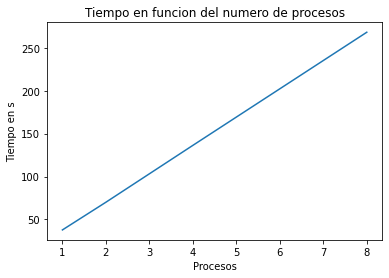

In [111]:
print(tiempos)
import matplotlib.pyplot as plt
plt.plot([1,2,4,8],tiempos)
plt.title("Tiempo en funcion del numero de procesos")
plt.xlabel("Procesos")
plt.ylabel("Tiempo en s")
plt.show()

[1.0, 0.53944738904487, 0.27721598205695347, 0.14093198559035464]


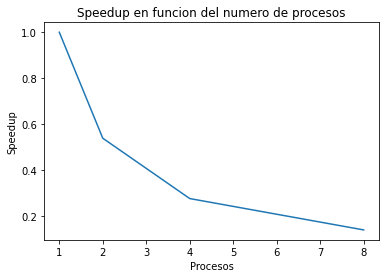

In [112]:
speedup=[]
for i in tiempos:
  speedup.append(tiempos[0]/i)
print(speedup)
plt.plot([1,2,4,8],speedup)
plt.title("Speedup en funcion del numero de procesos")
plt.xlabel("Procesos")
plt.ylabel("Speedup")
plt.show()

[1.0, 0.269723694522435, 0.09240532735231782, 0.03523299639758866]


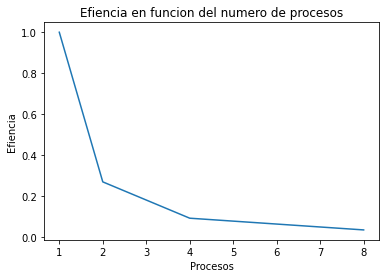

In [113]:
eficiencia=[]
for i in range(len(speedup)):
  eficiencia.append(speedup[i]/(i+1))
print(eficiencia)
plt.plot([1,2,4,8],eficiencia)
plt.title("Efiencia en funcion del numero de procesos")
plt.xlabel("Procesos")
plt.ylabel("Efiencia")
plt.show()